Election data project - Polls and Donors

Questions:
    1. Who was being polled and what was their party affiliation?
    2. On whose behalf the poll favoured to?
    3. How to undecided voters affect the poll
    4. Can we account for the undecided voters?
    5. How did voter sentiment change over time?
    6. Can we see an effect in the polls from the debates?
   
 


In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
import requests

In [5]:
from io import StringIO #Python 3 removed StringIO and made it io

In [6]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
url2 ="http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

In [7]:
source1 = requests.get(url).text
source2 = requests.get(url2).text

# to avoid an IO error in pandas
poll_data1 = StringIO(source1)
poll_data2 = StringIO(source2)

In [8]:
poll_df1 = pd.read_csv(poll_data1)
poll_df2 = pd.read_csv(poll_data2)

In [9]:
poll_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 55.0+ KB


In [10]:
poll_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 136.8+ KB


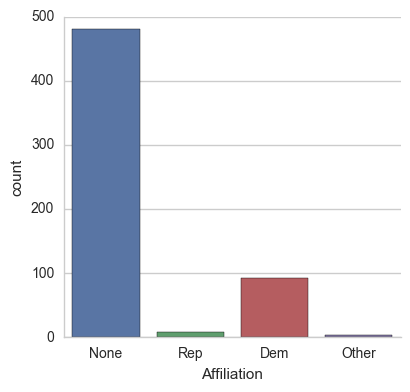

In [11]:
sns.factorplot('Affiliation', data=poll_df1, kind='count')

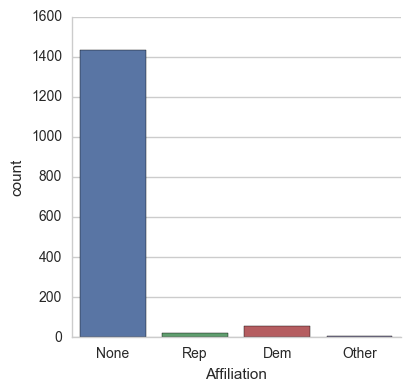

In [12]:
sns.factorplot('Affiliation', data=poll_df2, kind='count')

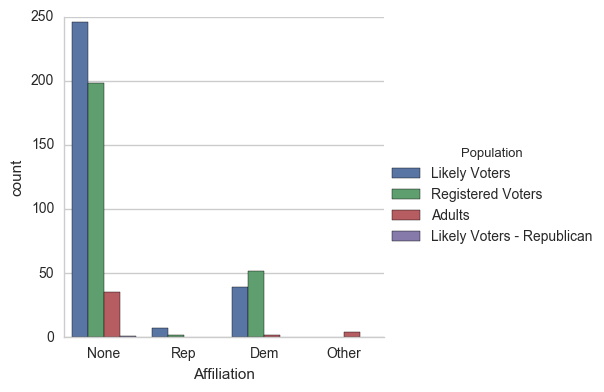

In [13]:
sns.factorplot('Affiliation', data=poll_df1, kind='count', hue='Population')

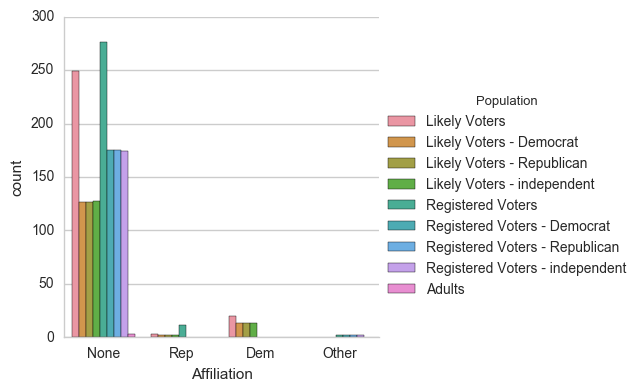

In [14]:
sns.factorplot('Affiliation', data=poll_df2, kind='count', hue='Population')

In [15]:
poll_df1.head(1)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1


In [16]:
avg = pd.DataFrame(poll_df1.mean())

avg.drop(['Number of Observations','Question Text'], axis=0, inplace=True)

In [17]:
avg1 = pd.DataFrame(poll_df2.mean())

avg1.drop(['Number of Observations','Question Iteration'], axis=0, inplace=True)

In [18]:
avg1.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [19]:
std = pd.DataFrame(poll_df1.std())

std.drop(['Number of Observations','Question Text'], axis=0, inplace=True)

In [20]:
std2 = pd.DataFrame(poll_df2.std())

std2.drop(['Number of Observations','Question Iteration'], axis=0, inplace=True)

In [21]:
std2.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


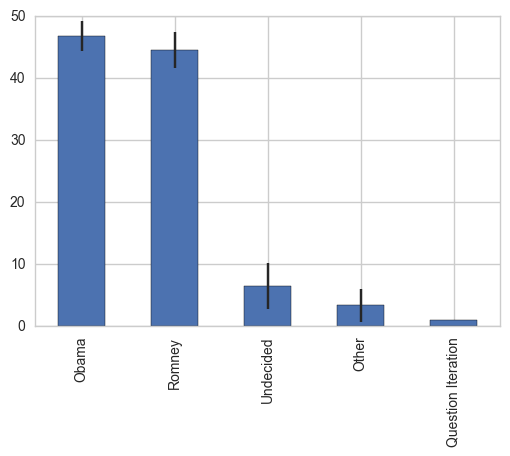

In [22]:
avg.plot(yerr=std, legend=False, kind='bar')

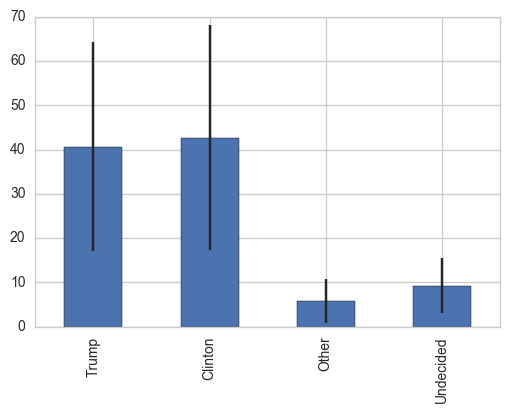

In [23]:
avg1.plot(yerr=std2, legend=False, kind='bar')

In [24]:
poll_avg = pd.concat([avg,std],axis=1)

In [25]:
poll_avg.columns=['Mean','STD']

In [26]:
poll_avg

,Mean,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Iteration,1.000000,0.000000


In [27]:
poll_avg2=pd.concat([avg1,std2],axis=1)

In [28]:
poll_avg2

,0,0
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [29]:
poll_df1.head(1)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1


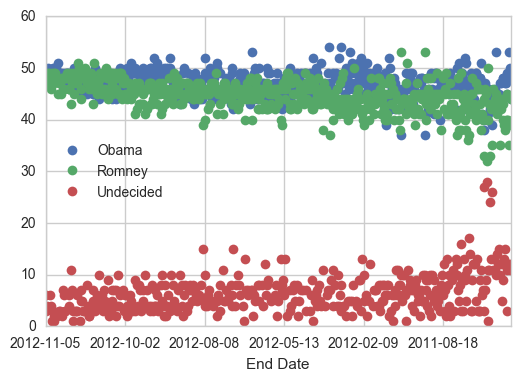

In [30]:
poll_df1.plot(x='End Date',y=['Obama','Romney','Undecided'], kind='line', linestyle='',marker='o')

In [31]:
poll_df2.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Trump', 'Clinton',
       'Other', 'Undecided', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

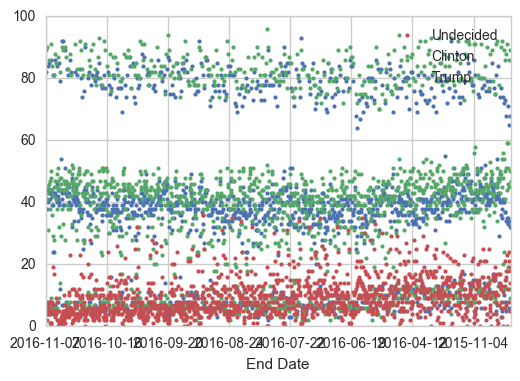

In [32]:
poll_df2.plot(x='End Date',y=['Trump','Clinton','Undecided'], kind='line', linestyle='',marker='o',markersize=3, legend='reverse')

In [33]:
from datetime import datetime

In [34]:
poll_df1['Difference'] = (poll_df1.Obama - poll_df1.Romney)/100

poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [35]:
poll_df2['Difference'] = (poll_df2.Trump - poll_df2.Clinton)/100

poll_df2.head(1)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04


In [36]:
poll_df2 = poll_df2.groupby('Start Date',as_index=False).mean()

poll_df2.head(3)

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700


In [37]:
poll_df1 = poll_df1.groupby('Start Date',as_index=False).mean()

poll_df1.head(3)

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18


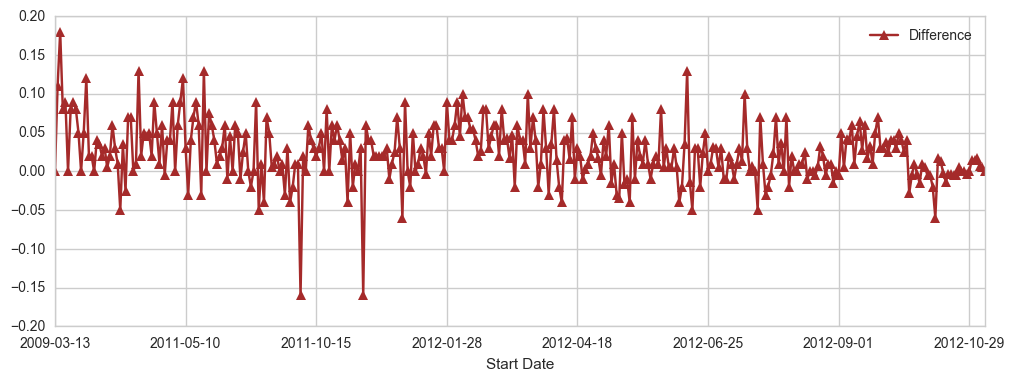

In [38]:
poll_df1.plot(x='Start Date', y='Difference', figsize=(12,4),marker='^', linestyle='-',color='brown')

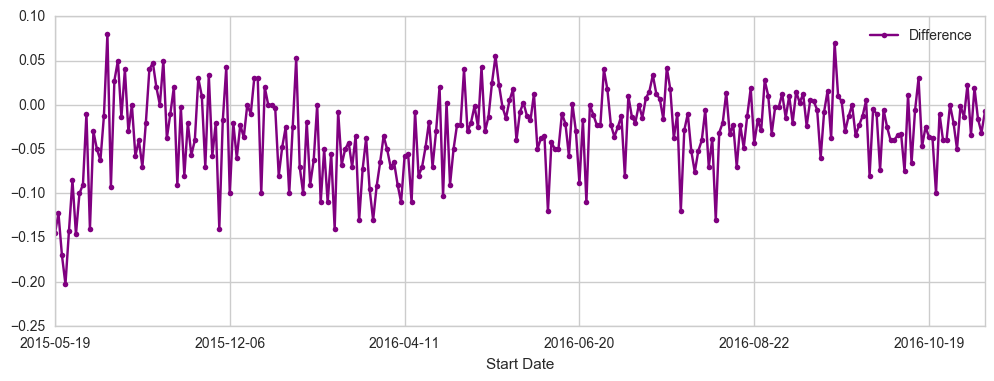

In [39]:
poll_df2.plot(x='Start Date', y='Difference', figsize=(12,4),marker='o',markersize=4, linestyle='-',color='purple')

In [40]:
# to make sentiment analysis based on debates

In [57]:
index = 0
xlim = []

for date in poll_df1['Start Date']:
    if date[0:7] == '2012-10':
        xlim.append(index)
    index=index+1

print(min(xlim))
print(max(xlim))

300
352


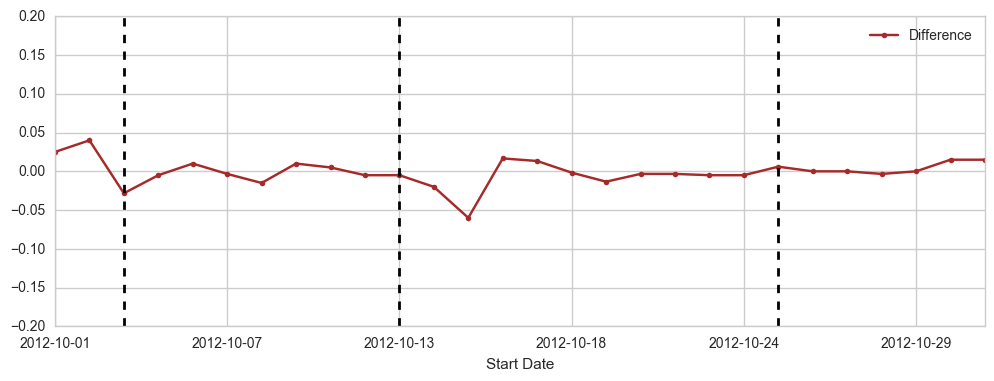

In [55]:
poll_df1.plot(x='Start Date', y='Difference', figsize=(12,4),marker='o',markersize=4,\
              linestyle='-',color='brown', xlim=(325,352))

# Debate on 3rd Oct 
plt.axvline(x=325+2, linestyle='--', linewidth=2, color='black')

# Debate on 11th Oct
plt.axvline(x=325+10, linestyle='--', linewidth=2, color='black')

# Debate on 22nd Oct
plt.axvline(x=325+21, linestyle='--', linewidth=2, color='black')

In [82]:
index2 = 0
xlim2 = []

for date in poll_df2['Start Date']:
    if date[0:7] == '2016-09' or date[0:7] == '2016-10':
        xlim2.append(index2)
    index2=index2+1

print(min(xlim2))
print(max(xlim2))

209
262


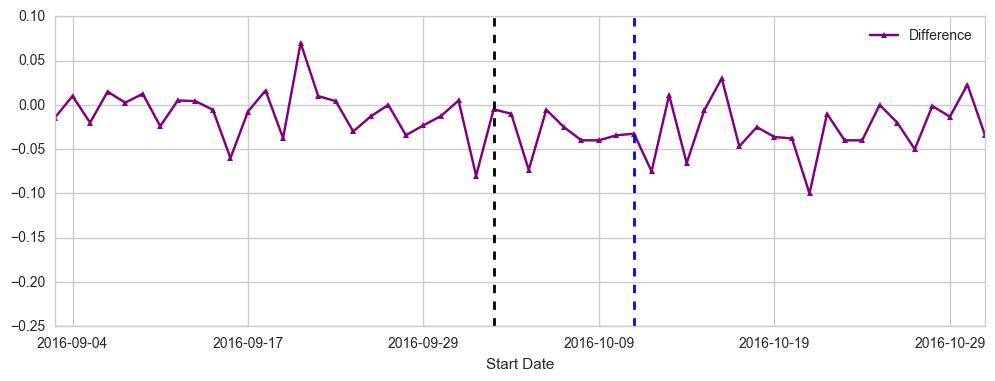

In [89]:
poll_df2.plot(x='Start Date', y='Difference', figsize=(12,4),marker='^',markersize=4,\
              linestyle='-',color='purple', xlim=(209,262))

# Debate on 26th Sep 
plt.axvline(x=209+25, linestyle='--', linewidth=2, color='black')

# Debate on 4rd Oct
plt.axvline(x=209+30+3, linestyle='--', linewidth=2, color='blue')

# Debate on 9th Oct
plt.axvline(x=325+30+9, linestyle='-', linewidth=2, color='pink')

The questions we will be trying to answer while looking at this Data Set is:
        1.) How much was donated and what was the average donation?
        2.) How did the donations differ between candidates?
        3.) How did the donations differ between Democrats and Republicans?
        4.) What were the demographics of the donors?
        5.) Is there a pattern to donation amounts?

In [90]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\sri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 68.8+ MB


In [92]:
donor_df.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [93]:
donor_df.contb_receipt_amt.value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 51.48           1
 55.98           1
 54.38           1
 44.63           1
 121.82          1
 73.06           1
 268.23          1
 60.74           1
 39.24           1
 8.99            1
-960.00          1
 1469.26         1
 2050.01         1
 2387.26         1
 32.24           1
 33.24           1
 36.24           1
 37.99           1
-965.00          1
 60.24           1
 42.74           1
 44.74      

In [98]:
don_mean = donor_df.contb_receipt_amt.mean()

don_std = donor_df.contb_receipt_amt.std()

print('Average donation was %.2f with std deviation %.2f'% (don_mean, don_std))

Average donation was 298.24 with std deviation 3749.67


In [100]:
top_donor = donor_df.contb_receipt_amt.copy()

In [101]:
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [102]:
# To get rid of negative values

top_donor = top_donor[top_donor.values>0]

In [105]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

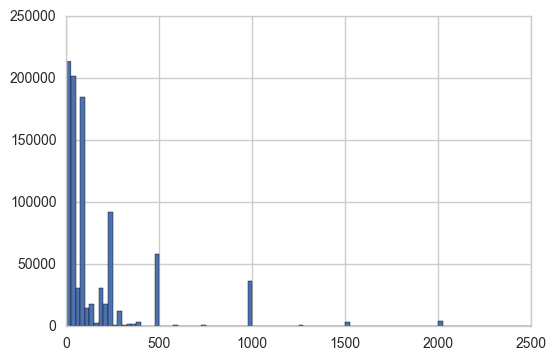

In [108]:
# to check if common donations are all round figures

common_don = top_donor[top_donor < 2500]
common_don.hist(bins=100)

In [109]:
# to see to which party the candidates are affiliated to 
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [110]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]

In [114]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [115]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [116]:
can_don_df = DataFrame(donor_df.groupby('cand_nm')['contb_receipt_amt'].sum())

In [117]:
can_don_df.head()

,contb_receipt_amt
cand_nm,
"Bachmann, Michelle",2711439.29
"Cain, Herman",7101081.89
"Gingrich, Newt",12832769.69
"Huntsman, Jon",3330373.48
"Johnson, Gary Earl",566961.60


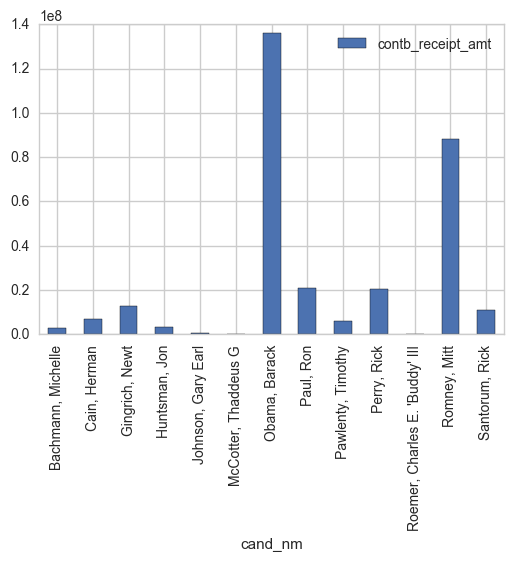

In [118]:
can_don_df.plot(kind='bar')

In [119]:
can_don_df['Count'] = donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

In [143]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [123]:
can_don_df['Weighted amount'] = can_don_df.contb_receipt_amt/can_don_df.Count

In [144]:
party_grp = donor_df.groupby('Party')['contb_receipt_amt'].sum()

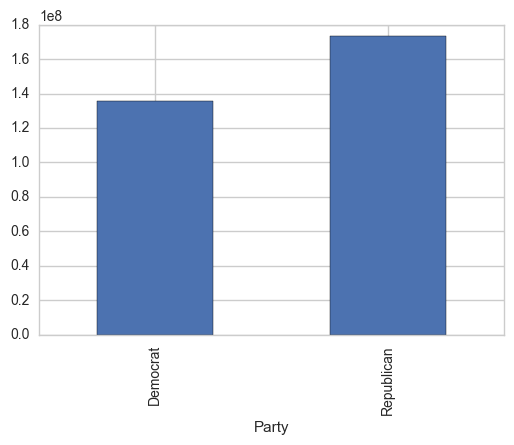

In [145]:
party_grp.plot(kind='bar')

In [146]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                            index='contbr_occupation',
                            columns='Party', aggfunc='sum'
                            )

In [147]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [149]:
occupation_df.shape

(45067, 2)

In [155]:
occupation_df = occupation_df[(occupation_df.sum(1) > 1000000)]

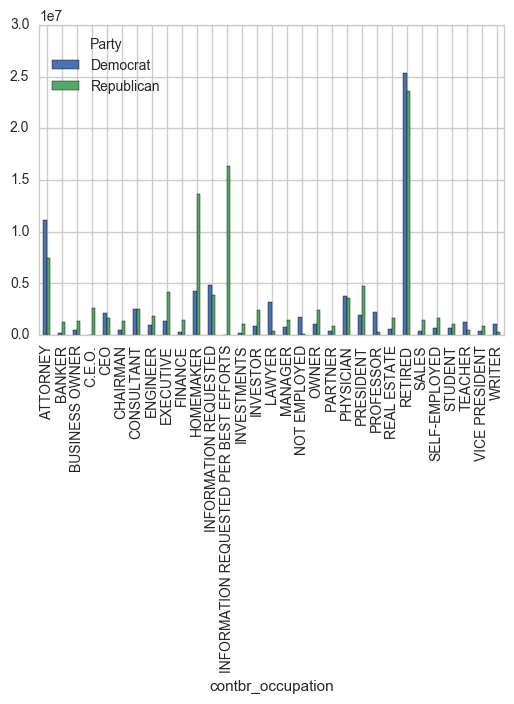

In [156]:
occupation_df.plot(kind='bar')

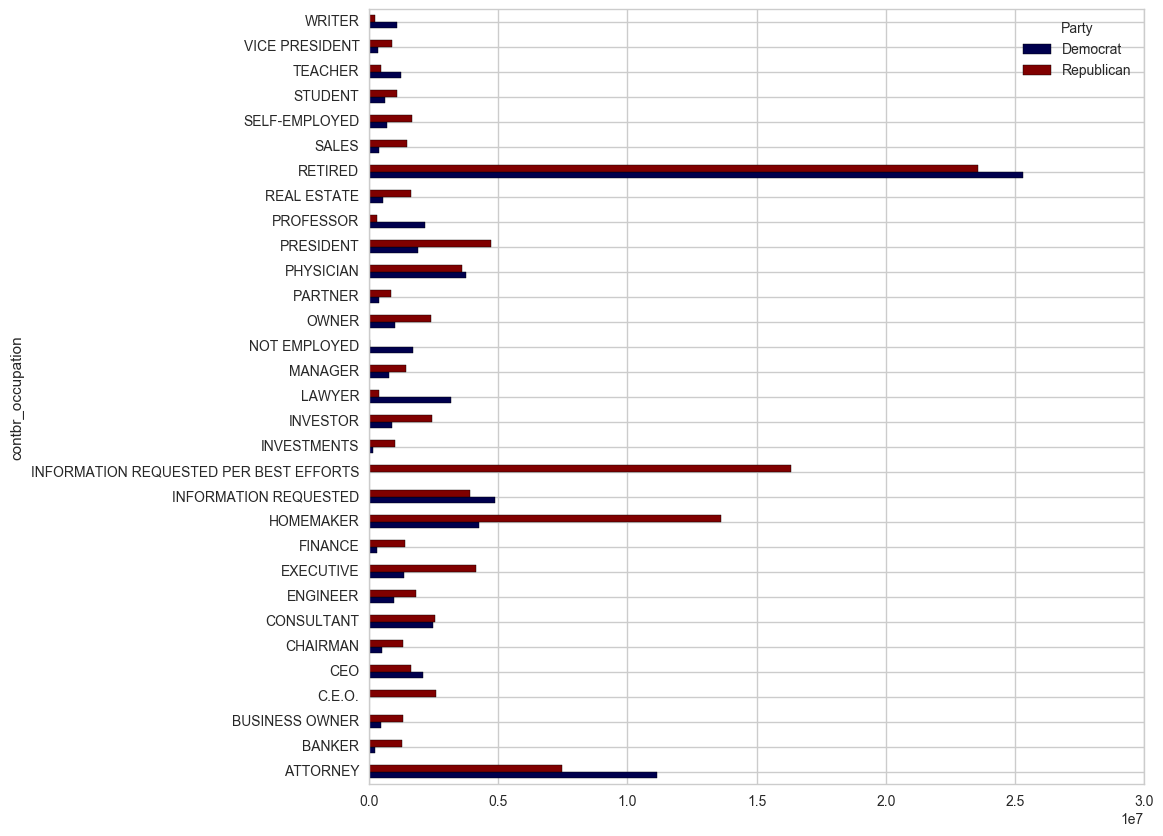

In [158]:
occupation_df.plot(kind='barh', cmap='seismic', figsize=(10,10))

In [166]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'], inplace=True)

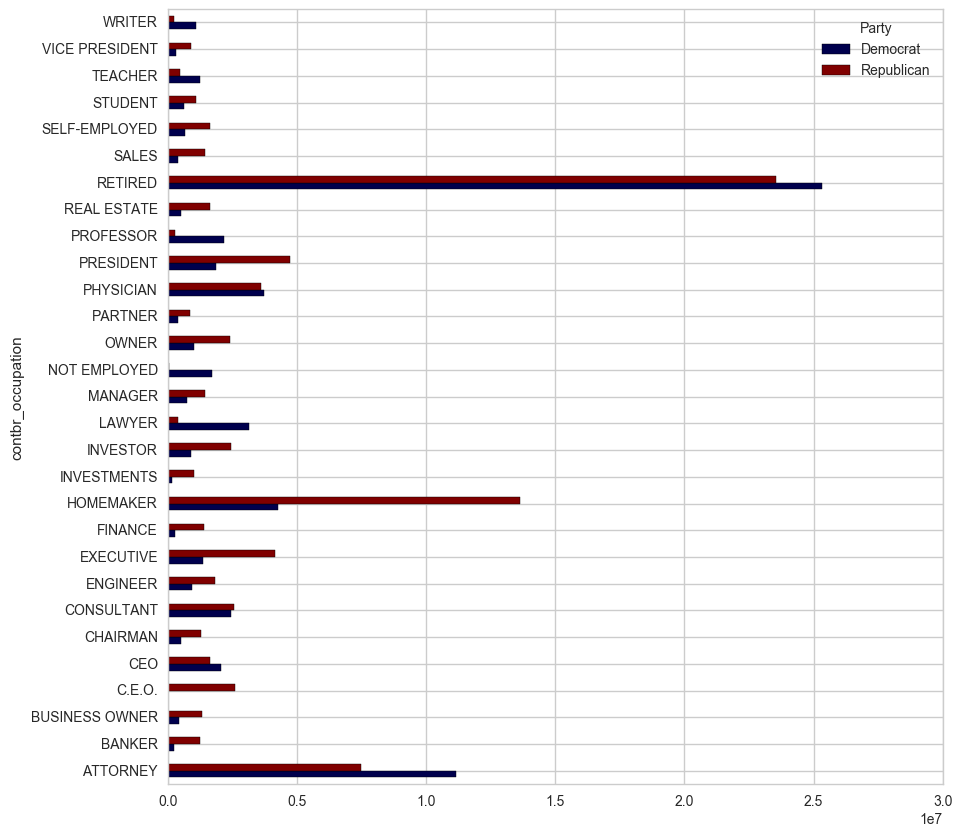

In [167]:
occupation_df.plot(kind='barh', cmap='seismic', figsize=(10,10))

In [169]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO']+occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.', inplace=True)

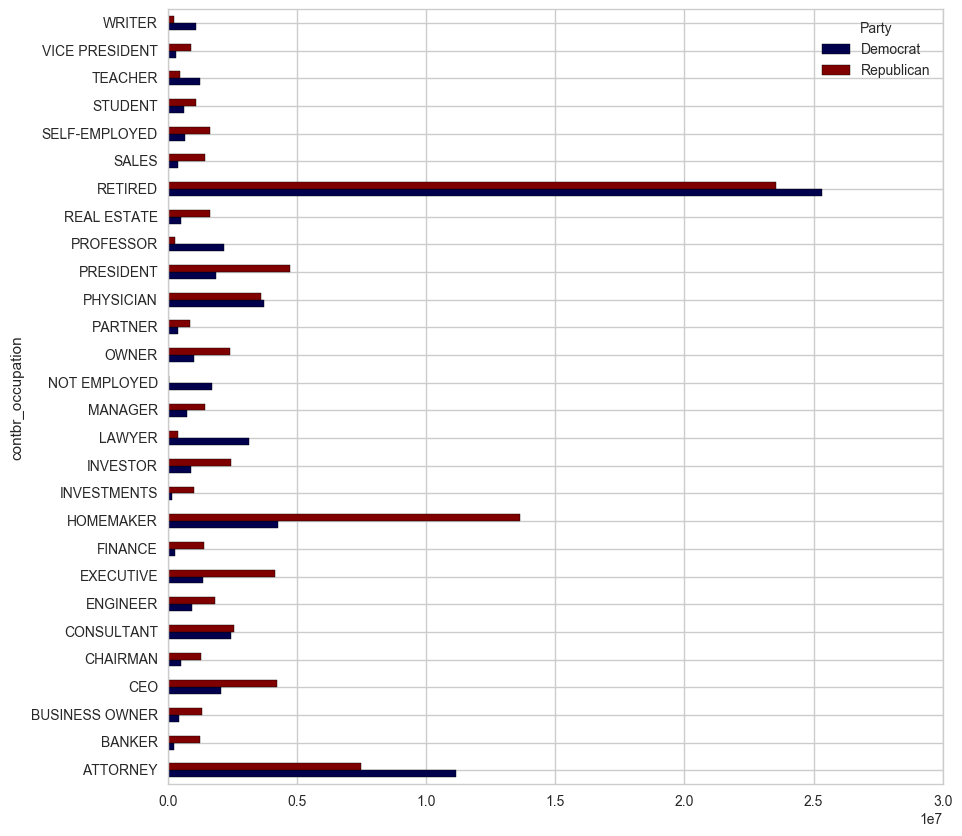

In [170]:
occupation_df.plot(kind='barh', cmap='seismic', figsize=(10,10))